# Linear Regression

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Read in the scores dataset.
data = pd.read_csv("./data/scores_synth.csv")

In [3]:
# Using pandas, use a single function that gets the count, mean, standard deviation, quantile values and maximum values.
data.describe()

,income,score,internet_connection
count,1000.000000,1000.000000,1000.000000
mean,25.132120,609.472997,0.691000
std,17.217098,82.097653,0.462312
min,0.893344,294.585973,0.000000
25%,13.581826,553.830647,0.000000
50%,19.073273,612.714370,1.000000
75%,34.970305,668.431175,1.000000
max,77.006947,845.859379,1.000000


In [4]:
# Using pandas, use a single function to get the correlation between all variables.
data.corr()

,income,score,internet_connection
income,1.000000,0.655725,0.229461
score,0.655725,1.000000,0.286389
internet_connection,0.229461,0.286389,1.000000


In [5]:
# Using both income and internet_connection to predict score, split the dataset into a 80/20 split. Use a random state of 42.
from sklearn.model_selection import train_test_split

X = data[["income", "internet_connection"]]
y = data["score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<Axes: xlabel='income', ylabel='score'>

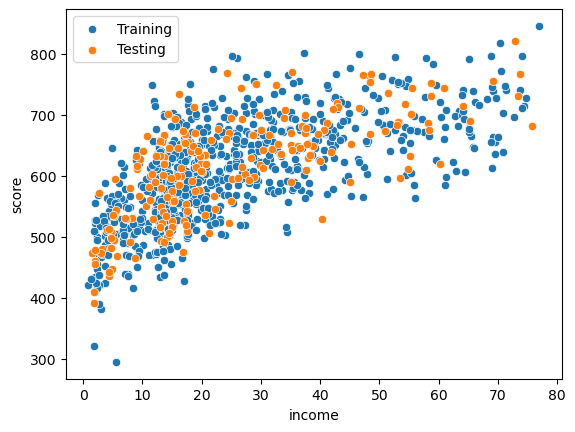

In [6]:
# Plot a scatter plot of the income (x-axis) and score (y-axis) of the training/testing observations.
sns.scatterplot(
    x = X_train["income"],
    y = y_train,
    label = "Training"
)
sns.scatterplot(
    x = X_test["income"],
    y = y_test,
    label = "Testing"
)

In [7]:
# Fit a linear regression model on the training dataset.
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [8]:
# Predict on the testing set.
preds = lr.predict(X_test)

<Axes: xlabel='income', ylabel='score'>

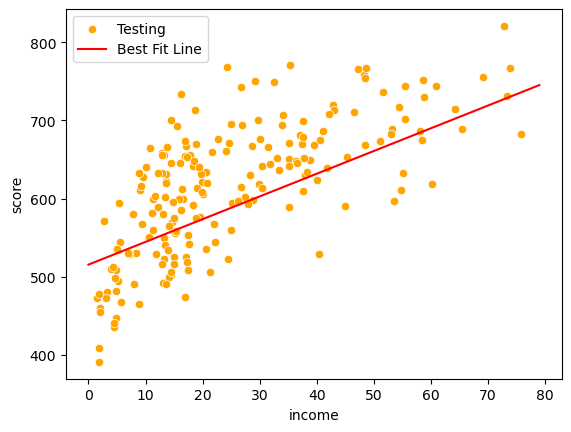

In [9]:
# Using only the testing scatter plot above with only income and score, plot the best fit line.
# Hint: Use the intercept and the correct coefficient to do so.

sns.scatterplot(
    x = X_test["income"],
    y = y_test,
    label = "Testing",
    color = "orange"
)


x_values = list(range(0,80))
y_values = [lr.intercept_ + (lr.coef_[0] * x) for x in x_values]

sns.lineplot(
    x = x_values,
    y = y_values,
    label = "Best Fit Line",
    color = "red"
)



# Metrics

For each of these metrics (MSE, RMSE, and MAE) and using <i><b>ONLY</b></i> the NumPy library, calculate these metrics from scratch. Then, compare this to Scikit-learn's version of these metrics by importing the necessary metric. Are your results similar or different? Why/Why not?

## Mean Squared Error

$$MSE = \frac{1}{N} \sum_i^N (Y_i-\hat{Y_i})^2$$

In [10]:
import numpy as np

preds_df = pd.DataFrame()
preds_df["actual"] = y_test
preds_df["prediction"] = preds

my_mse = np.mean((preds_df["actual"] - preds_df["prediction"])**2)

from sklearn.metrics import mean_squared_error

scikit_mse = mean_squared_error(preds_df["actual"], preds_df["prediction"])

print(f"My MSE: {my_mse}")
print(f"Scikit-Learn MSE: {scikit_mse}")


My MSE: 3607.6591811565186
Scikit-Learn MSE: 3607.6591811565186


## Root Mean Squared Error
$$RMSE = \sqrt{MSE}$$

In [11]:
print(f"My RMSE: {np.sqrt(my_mse)}")
print(f"Scikit-Learn RMSE: {np.sqrt(scikit_mse)}")

My RMSE: 60.063792597175535
Scikit-Learn RMSE: 60.063792597175535


## Mean Absolute Error

$$MAE = \frac{1}{N} \sum_i^N |Y_i-\hat{Y_i}| $$

In [12]:
my_mae = np.mean(np.abs(preds_df["actual"] - preds_df["prediction"]))
from sklearn.metrics import mean_absolute_error

scikit_mae = mean_absolute_error(preds_df["actual"], preds_df["prediction"])

print(f"My MAE: {my_mae}")
print(f"Scikit-Learn MAE: {scikit_mae}")

My MAE: 49.560238295407444
Scikit-Learn MAE: 49.560238295407444


## Challenge: Coefficient of Determination (R^2)
$$R^2 = 1 - \frac{\sum_{i=1}^{N}(y_i - \hat{y_i})^2 }{\sum_{i=1}^{N}(y_i - \bar{y})^2 }$$
such that ${y_i}$ is the _actual_ value of the $i$th observation, $\hat{y_i}$ is the _prediction_ of the $i$th observation, and $\bar{y}$ is the mean of all actual y values.

In [13]:
numerator = np.sum((preds_df["actual"] - preds_df["prediction"])**2)
denominator = np.sum((preds_df["actual"] - np.mean(preds_df["actual"]))**2)
my_r2 = 1 - (numerator / denominator)

from sklearn.metrics import r2_score

scikit_r2 = r2_score(preds_df["actual"], preds_df["prediction"])

print(f"My R^2: {my_r2}")
print(f"Scikit Learn R^2: {scikit_r2}")


My R^2: 0.4824460840625966
Scikit Learn R^2: 0.4824460840625966
